# Profiling notebook to profile different optimizations

Usage for running a unit test on a particular implementation :

In [ ]:
! python default/artificialneuralnetwork.py --max_iter 300

initial cost function J = 2.0368341799643392
initial accuracy on training set = 0.3333333333333333
iter=  1:  Jtrain= 1.9494 acc= 33.33%  |  Jtest= 2.0102 acc= 33.33%
iter=  2:  Jtrain= 1.9412 acc= 33.33%  |  Jtest= 2.0019 acc= 33.33%
iter=  3:  Jtrain= 1.9312 acc= 33.33%  |  Jtest= 1.9918 acc= 33.33%
iter=  4:  Jtrain= 1.9303 acc= 33.41%  |  Jtest= 1.9908 acc= 33.19%
iter=  5:  Jtrain= 1.9302 acc= 37.44%  |  Jtest= 1.9907 acc= 39.85%
iter=  6:  Jtrain= 1.9301 acc= 33.30%  |  Jtest= 1.9906 acc= 37.19%
iter=  7:  Jtrain= 1.9299 acc= 33.33%  |  Jtest= 1.9899 acc= 33.33%
iter=  8:  Jtrain= 1.9291 acc= 33.33%  |  Jtest= 1.9874 acc= 33.33%
iter=  9:  Jtrain= 1.9277 acc= 33.26%  |  Jtest= 1.9843 acc= 33.33%
iter= 10:  Jtrain= 1.9267 acc= 33.15%  |  Jtest= 1.9815 acc= 33.19%
iter= 11:  Jtrain= 1.9264 acc= 35.70%  |  Jtest= 1.9806 acc= 34.81%
iter= 12:  Jtrain= 1.9246 acc= 34.22%  |  Jtest= 1.9771 acc= 33.19%
iter= 13:  Jtrain= 1.9236 acc= 32.30%  |  Jtest= 1.9753 acc= 32.44%
iter= 14:  Jtrain

For the following timing benchmarks, the tests have been run in a Python console. Mean and standard deviation on the test ran is computed using this testing function :

```python
def stdTime(n_runs=10):
    """Compute the standard deviation of execution times over multiple runs."""
    times = []
    global N_iter, J_min, theta_best, Js_train, Js_test
    for _ in range(n_runs):
        N_iter = 1
        J_min = jnp.inf
        theta_best = []
        Js_train = jnp.array([])
        Js_test = jnp.array([])
        start_time = timer()
        main()
        end_time = timer()
        times.append(end_time - start_time)
    
    mean_time = np.mean(times)
    std_dev = np.std(times)
    
    print(f"\nMean execution time: {mean_time:.6f} seconds")
    print(f"Standard deviation: {std_dev:.6f} seconds")
    
    return mean_time, std_dev
```

## 1. Data Layout

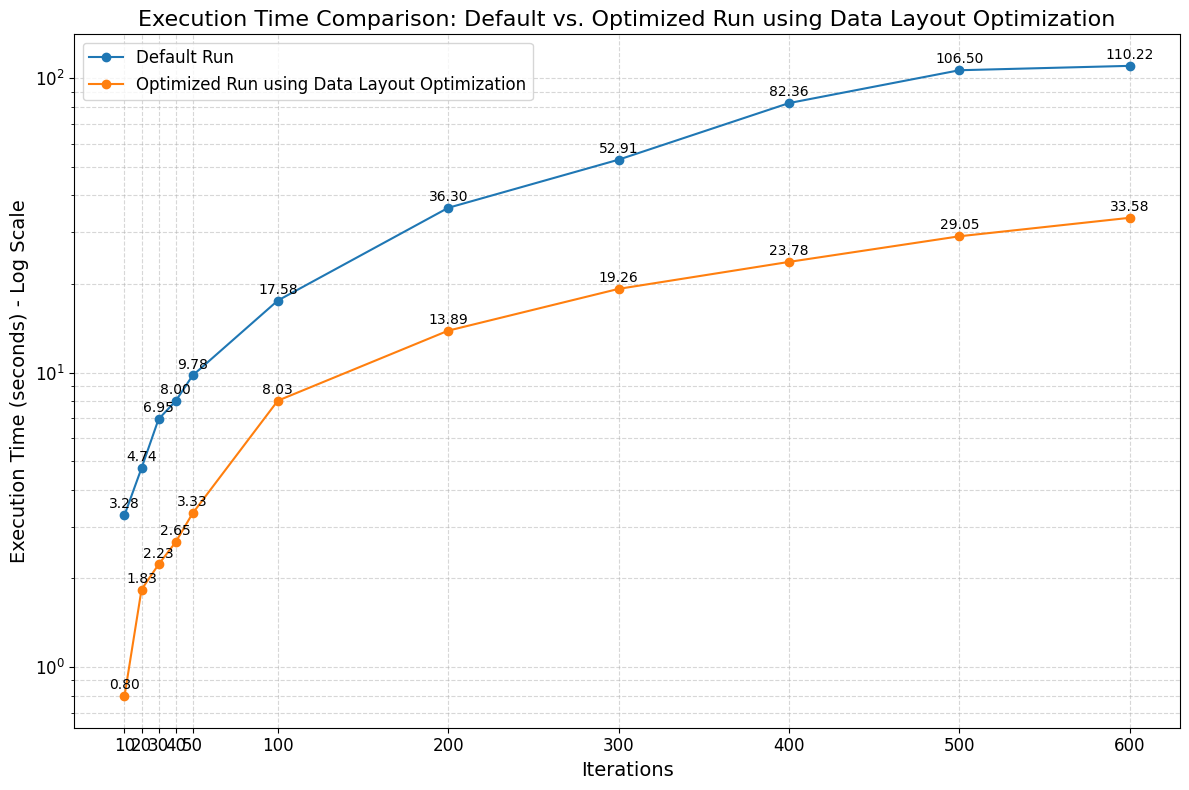

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    iterations, times = np.loadtxt(filename, unpack=True)
    return iterations.astype(int), times

iterations_default, times_default = read_data("default/default_run.txt")
iterations_data_layout, times_data_layout = read_data("data_layout_opti/data_layout_run.txt")

plt.figure(figsize=(12, 8))
plt.yscale('log')

plt.plot(iterations_default, times_default, marker='o', linestyle='-', label="Default Run")
plt.plot(iterations_data_layout, times_data_layout, marker='o', linestyle='-', label="Optimized Run using Data Layout Optimization")

for i, txt in enumerate(times_default):
    plt.annotate(f"{txt:.2f}", (iterations_default[i], times_default[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_data_layout):
    plt.annotate(f"{txt:.2f}", (iterations_data_layout[i], times_data_layout[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Execution Time (seconds) - Log Scale", fontsize=14)
plt.title("Execution Time Comparison: Default vs. Optimized Run using Data Layout Optimization", fontsize=16)
plt.xticks(iterations_default, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## 2. Cython

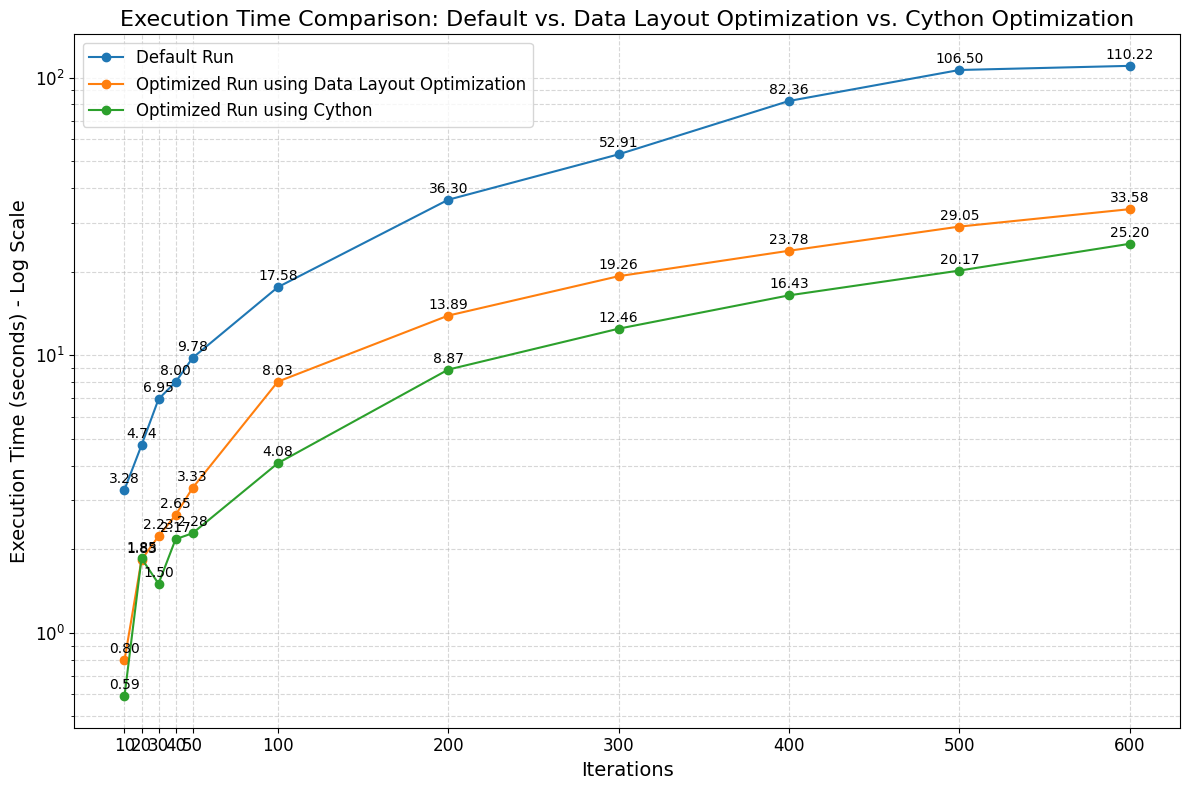

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    iterations, times = np.loadtxt(filename, unpack=True)
    return iterations.astype(int), times

iterations_default, times_default = read_data("default/default_run.txt")
iterations_data_layout, times_data_layout = read_data("data_layout_opti/data_layout_run.txt")
iterations_cython, times_cython = read_data("cython_opti/cython_run.txt")

plt.figure(figsize=(12, 8))
plt.yscale('log')

plt.plot(iterations_default, times_default, marker='o', linestyle='-', label="Default Run")
plt.plot(iterations_data_layout, times_data_layout, marker='o', linestyle='-', label="Optimized Run using Data Layout Optimization")
plt.plot(iterations_cython, times_cython, marker='o', linestyle='-', label="Optimized Run using Cython")

for i, txt in enumerate(times_default):
    plt.annotate(f"{txt:.2f}", (iterations_default[i], times_default[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_data_layout):
    plt.annotate(f"{txt:.2f}", (iterations_data_layout[i], times_data_layout[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_cython):
    plt.annotate(f"{txt:.2f}", (iterations_cython[i], times_cython[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Execution Time (seconds) - Log Scale", fontsize=14)
plt.title("Execution Time Comparison: Default vs. Data Layout Optimization vs. Cython Optimization", fontsize=16)
plt.xticks(iterations_default, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## 3. GPU

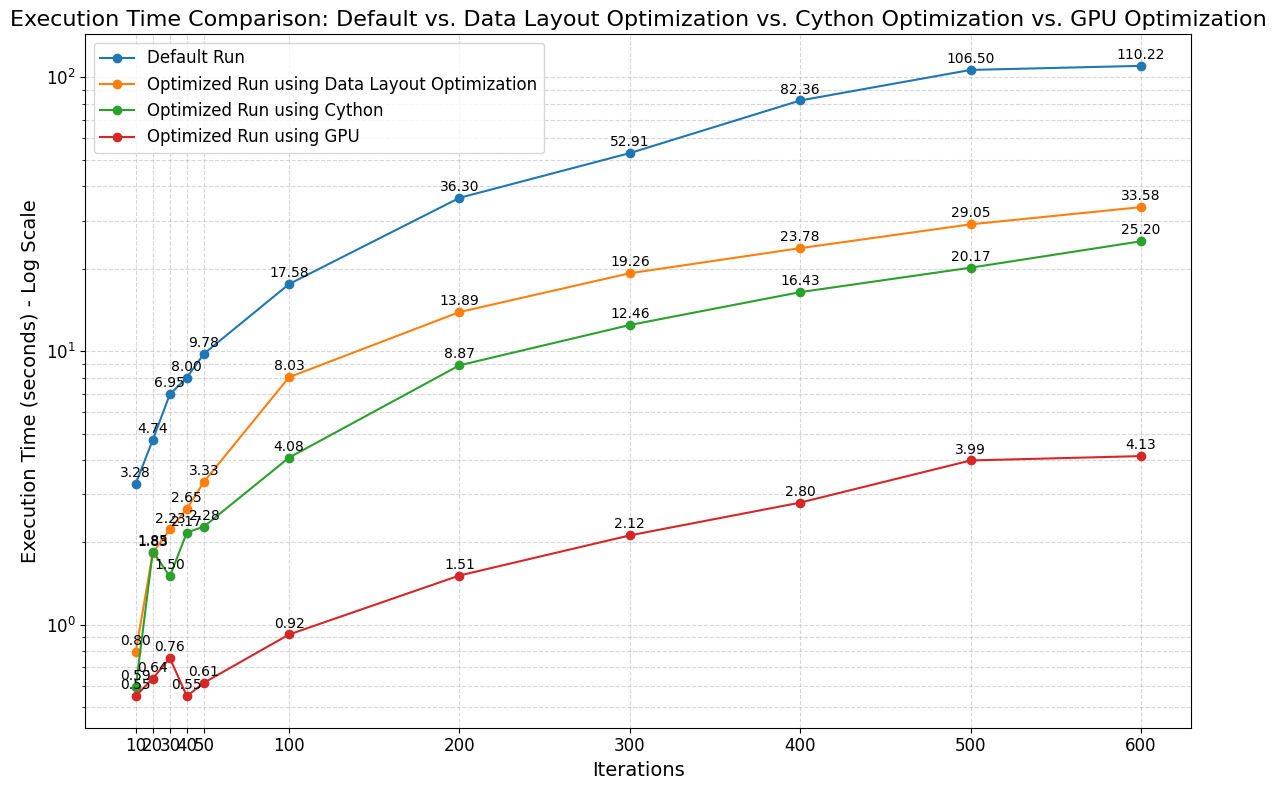

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    iterations, times = np.loadtxt(filename, unpack=True)
    return iterations.astype(int), times

iterations_default, times_default = read_data("default/default_run.txt")
iterations_data_layout, times_data_layout = read_data("data_layout_opti/data_layout_run.txt")
iterations_cython, times_cython = read_data("cython_opti/cython_run.txt")
iterations_gpu, times_gpu = read_data("gpu_opti/gpu_run.txt")

plt.figure(figsize=(12, 8))
plt.yscale('log')

plt.plot(iterations_default, times_default, marker='o', linestyle='-', label="Default Run")
plt.plot(iterations_data_layout, times_data_layout, marker='o', linestyle='-', label="Optimized Run using Data Layout Optimization")
plt.plot(iterations_cython, times_cython, marker='o', linestyle='-', label="Optimized Run using Cython")
plt.plot(iterations_gpu, times_gpu, marker='o', linestyle='-', label="Optimized Run using GPU")

for i, txt in enumerate(times_default):
    plt.annotate(f"{txt:.2f}", (iterations_default[i], times_default[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_data_layout):
    plt.annotate(f"{txt:.2f}", (iterations_data_layout[i], times_data_layout[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_cython):
    plt.annotate(f"{txt:.2f}", (iterations_cython[i], times_cython[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_gpu):
    plt.annotate(f"{txt:.2f}", (iterations_gpu[i], times_gpu[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Execution Time (seconds) - Log Scale", fontsize=14)
plt.title("Execution Time Comparison: Default vs. Data Layout Optimization vs. Cython Optimization vs. GPU Optimization", fontsize=16)
plt.xticks(iterations_default, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## 4. JAX

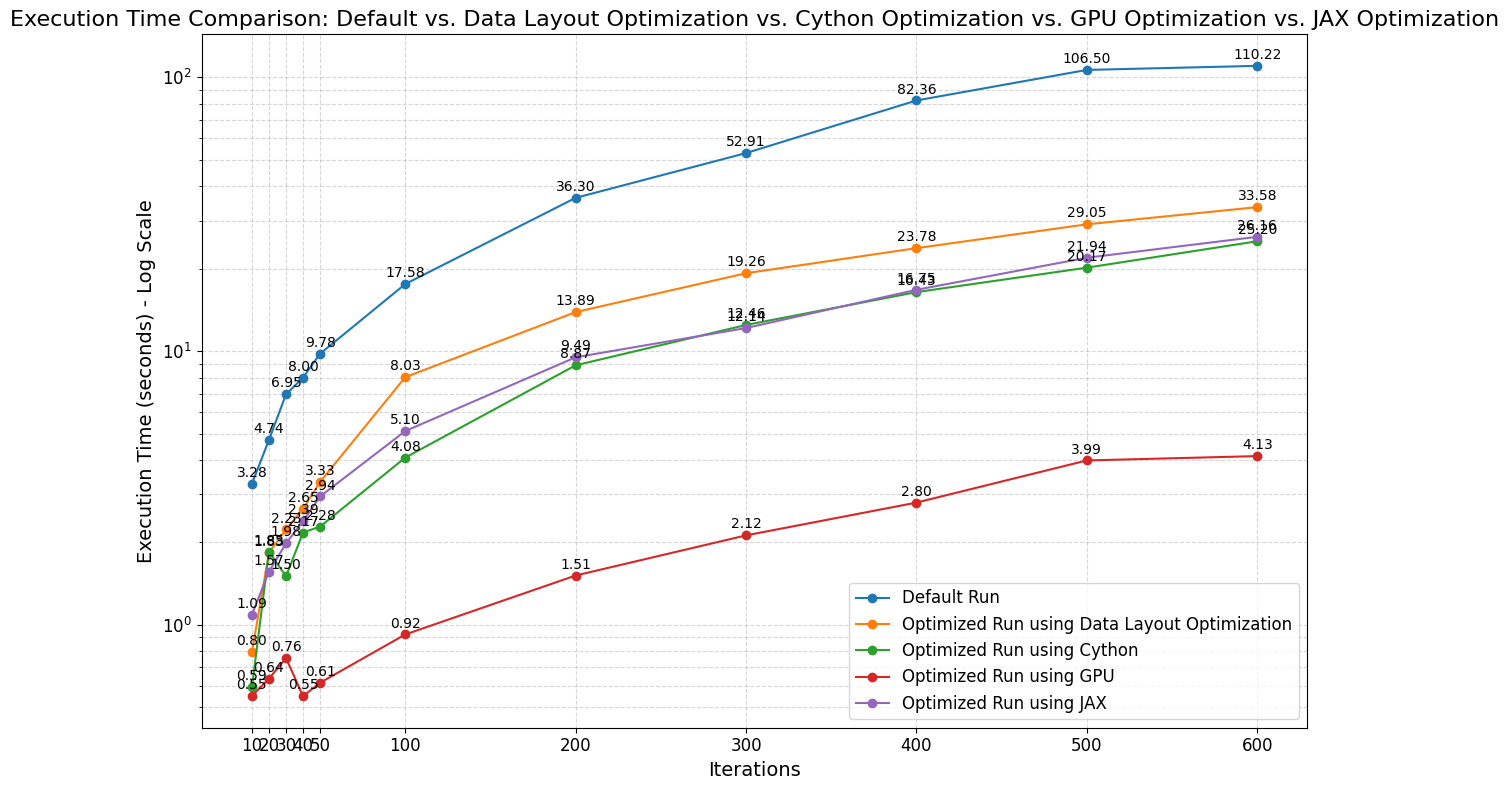

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    iterations, times = np.loadtxt(filename, unpack=True)
    return iterations.astype(int), times

iterations_default, times_default = read_data("default/default_run.txt")
iterations_data_layout, times_data_layout = read_data("data_layout_opti/data_layout_run.txt")
iterations_cython, times_cython = read_data("cython_opti/cython_run.txt")
iterations_gpu, times_gpu = read_data("gpu_opti/gpu_run.txt")
iterations_jax, times_jax = read_data("parallelize_opti/jax_run.txt")

plt.figure(figsize=(12, 8))
plt.yscale('log')

plt.plot(iterations_default, times_default, marker='o', linestyle='-', label="Default Run")
plt.plot(iterations_data_layout, times_data_layout, marker='o', linestyle='-', label="Optimized Run using Data Layout Optimization")
plt.plot(iterations_cython, times_cython, marker='o', linestyle='-', label="Optimized Run using Cython")
plt.plot(iterations_gpu, times_gpu, marker='o', linestyle='-', label="Optimized Run using GPU")
plt.plot(iterations_jax, times_jax, marker='o', linestyle='-', label="Optimized Run using JAX")

for i, txt in enumerate(times_default):
    plt.annotate(f"{txt:.2f}", (iterations_default[i], times_default[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_data_layout):
    plt.annotate(f"{txt:.2f}", (iterations_data_layout[i], times_data_layout[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_cython):
    plt.annotate(f"{txt:.2f}", (iterations_cython[i], times_cython[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_gpu):
    plt.annotate(f"{txt:.2f}", (iterations_gpu[i], times_gpu[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(times_jax):
    plt.annotate(f"{txt:.2f}", (iterations_jax[i], times_jax[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Execution Time (seconds) - Log Scale", fontsize=14)
plt.title("Execution Time Comparison: Default vs. Data Layout Optimization vs. Cython Optimization vs. GPU Optimization vs. JAX Optimization", fontsize=16)
plt.xticks(iterations_default, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Summary

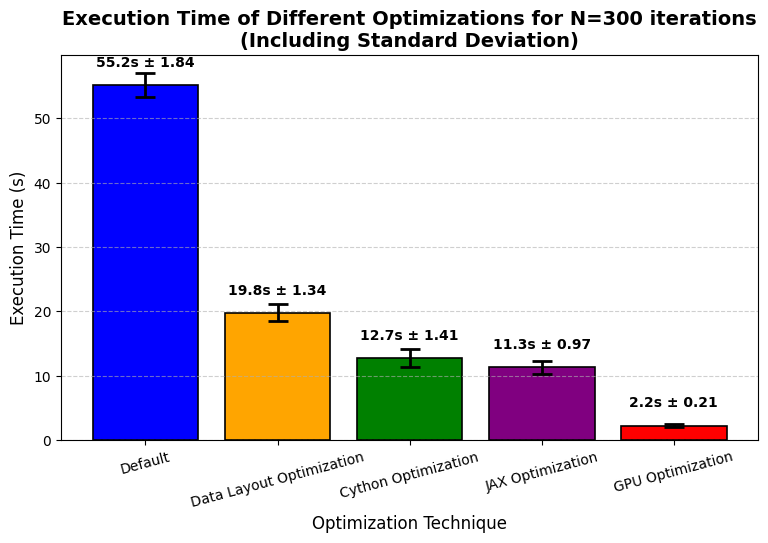

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_path = "summary/summary.txt"

techniques = []
execution_times = []
std_devs = []

with open(file_path, "r") as file:
    for line in file:
        parts = line.strip().rsplit(" ", 2)
        if len(parts) == 3:  
            technique, mean_time, std_dev = parts[0], float(parts[1]), float(parts[2])
            techniques.append(technique)
            execution_times.append(mean_time)
            std_devs.append(std_dev)

# plot the bar chart with error bars
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(
    techniques, execution_times, yerr=std_devs, capsize=7, 
    color=['blue', 'orange', 'green', 'purple', 'red'], 
    edgecolor='black', linewidth=1.2, 
    error_kw={'elinewidth': 2, 'capthick': 2} 
)

# add standard deviation text above bars
for bar, mean, std in zip(bars, execution_times, std_devs):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2.4, 
            f"{mean:.1f}s ± {std:.2f}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Optimization Technique", fontsize=12)
plt.ylabel("Execution Time (s)", fontsize=12)
plt.title("Execution Time of Different Optimizations for N=300 iterations\n(Including Standard Deviation)", fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
